# Cosas necesarias del principio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importo librerias y tabla ya limpia, haciendo la copia

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



clean_tabla_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv', index_col=0)
df = clean_tabla_df.copy()
df

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,escuela_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,repeticion_primaria,repeticion_secundaria,nivel_id,year_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,tasa_con_nbi,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,lengua_avanzado,lengua_satisfactorio,lengua_Basico,lengua_Bajo_Basico,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,540901809,0.0,2.0,satisfactorio,satisfactorio,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.009901,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,1.162457,0.0,0.000000,0.000000,1.166861,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
457489.0,1152730019,0.0,1.0,por_debajo_del_basico,basico,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,0.000000,0.0,1.100506,0.000000,0.000000,1.104708,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1563023.0,1145017919,0.0,2.0,NaN,NaN,NaN,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,0,0,0.267,0.0,1.816327,1.0,0,1.0,2.0,0.0,0.104660,1,1,1,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.537383,0.0,0.000000,0.0,0.0
1795162.0,1022298417,0.0,1.0,NaN,NaN,basico,por_debajo_del_basico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,2017,0,0,0.442,1.0,1.865169,1.0,0,0.0,2.0,0.0,0.104660,1,1,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.169184,0.0,0.000000,0.000000,0.0,1.166764,0.0,0.0
508042.0,1152730019,0.0,1.0,satisfactorio,avanzado,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,1.100506,0.0,0.000000,1.104708,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973858.0,25204992428,NaN,2.0,avanzado,satisfactorio,avanzado,avanzado,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,3,2016,0,1,-1.000,NaN,2.801980,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,1.139511,0.000000,0.0,0.000000,0.000000,1.049554,0.000000,0.0,1.037433,0.0,0.000000,0.0,1.044834,0.000000,0.0,0.000000,250.0,23.0
1060039.0,24302357127,NaN,1.0,por_debajo_del_basico,satisfactorio,avanzado,satisfactorio,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,3,2016,0,1,-1.000,NaN,2.615385,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,0.000000,0.000000,0.0,1.488929,0.000000,1.457099,0.000000,0.0,1.355550,0.0,0.000000,0.0,0.000000,1.450546,0.0,0.000000,250.0,23.0
1665267.0,27905229731,0.0,2.0,NaN,NaN,avanzado,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,1,1,-1.000,NaN,2.166667,2.0,0,1.0,1.0,0.0,0.083297,1,1,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.007280,0.0,0.000000,0.0,0.000000,1.008751,0.0,0.000000,250.0,23.0


# Random Forest

elijo variables que me parecen relevantes.

In [ ]:
df_rf=df[df.nivel_id == 3].copy()
df_rf = df_rf[['indice_socioeconomico_medio_cat','tiene_smartphone','gestion','mate_nc_na','Mate_avanzado','Mate_satisfactorio','Mate_Basico','Mate_Bajo_Basico']]
df_rf

,indice_socioeconomico_medio_cat,tiene_smartphone,gestion,mate_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico
id,,,,,,,,
1037297.0,1.0,1.0,0,0,0.000000,0.000000,0.000000,1.462675
1014085.0,1.0,1.0,0,0,0.000000,0.000000,1.462675,0.000000
67702.0,1.0,NaN,0,0,0.000000,0.000000,0.000000,1.877512
1130145.0,1.0,1.0,0,0,1.644481,0.000000,0.000000,0.000000
218677.0,2.0,NaN,1,0,0.000000,0.000000,0.000000,1.468137
...,...,...,...,...,...,...,...,...
1122927.0,2.0,0.0,1,0,0.000000,1.104980,0.000000,0.000000
111435.0,2.0,NaN,1,0,0.000000,1.267878,0.000000,0.000000
973858.0,2.0,1.0,1,0,1.139511,0.000000,0.000000,0.000000


reemplazo los -1 por nan para despues hacer dropna

In [ ]:
df_rf = df_rf.replace(-1,np.NaN)
df_rf.describe()

,indice_socioeconomico_medio_cat,tiene_smartphone,gestion,mate_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico
count,670473.000000,287662.000000,680958.000000,680958.000000,680958.000000,680958.000000,680958.000000,680958.000000
mean,1.348335,0.386172,0.402830,0.175572,0.081781,0.344021,0.348469,0.513070
std,0.716021,0.486872,0.490467,0.380456,0.357804,0.707903,0.749196,0.876392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.200755
max,2.000000,1.000000,1.000000,1.000000,14.339213,22.259783,22.259783,22.259783


saco los nans a ver cuanto me queda

In [ ]:
df_rf = df_rf
df_rf = df_rf[df_rf['mate_nc_na'] != 1]
df_rf.describe()

,indice_socioeconomico_medio_cat,tiene_smartphone,gestion,mate_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico
count,249674.000000,249674.000000,249674.000000,249674.0,249674.000000,249674.000000,249674.000000,249674.000000
mean,1.342647,0.395724,0.424550,0.0,0.079635,0.383962,0.460987,0.644310
std,0.729116,0.489007,0.494275,0.0,0.366539,0.793873,0.887217,1.024177
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.003456,1.171339
max,2.000000,1.000000,1.000000,0.0,14.339213,22.259783,22.259783,22.259783


me quedan solo 130000 datos... esperemos completar despues con el umap

agrego columna de aprobacion, y creo variable de compu para reemplazar la de notebook y pc

In [ ]:
def f(row):
  if (row['Mate_avanzado'] !=0) | (row['Mate_satisfactorio'] !=0) | (row['Mate_Basico'] !=0):
    val = 1 # 3 significa que aprobo
  else:
    val = 0 # 0 significa bajo del basico, desaprobo
  return val
#def g(row):
#  if (row['repeticion_primaria']==1) | (row['repeticion_primaria']==2) | (row['repeticion_primaria']==3):
#    val = 1
#  else:
#    val = 0
#  return val
df_rf["aprobacion"] = df_rf.apply(f,axis=1)
#df_rf["repite"] = df_rf.apply(g,axis=1)
df_rf

,indice_socioeconomico_medio_cat,tiene_smartphone,gestion,mate_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,aprobacion
id,,,,,,,,,
1037297.0,1.0,1.0,0,0,0.000000,0.00000,0.000000,1.462675,0
1014085.0,1.0,1.0,0,0,0.000000,0.00000,1.462675,0.000000,1
1130145.0,1.0,1.0,0,0,1.644481,0.00000,0.000000,0.000000,1
1047308.0,1.0,0.0,0,0,0.000000,0.00000,1.401730,0.000000,1
1206413.0,1.0,1.0,0,0,0.000000,0.00000,1.522667,0.000000,1
...,...,...,...,...,...,...,...,...,...
1000351.0,2.0,1.0,1,0,0.000000,0.00000,1.424193,0.000000,1
1122927.0,2.0,0.0,1,0,0.000000,1.10498,0.000000,0.000000,1
973858.0,2.0,1.0,1,0,1.139511,0.00000,0.000000,0.000000,1


separo variables dependientes e independientes

In [ ]:
# X es mi variable independiente. Los datos que voy a usar para predecir mi variable independiente, y
X = df_rf.drop(['mate_nc_na','Mate_avanzado','Mate_satisfactorio','Mate_Basico','Mate_Bajo_Basico','aprobacion'], axis=1).copy()
X

,indice_socioeconomico_medio_cat,tiene_smartphone,gestion
id,,,
1037297.0,1.0,1.0,0
1014085.0,1.0,1.0,0
1130145.0,1.0,1.0,0
1047308.0,1.0,0.0,0
1206413.0,1.0,1.0,0
...,...,...,...
1000351.0,2.0,1.0,1
1122927.0,2.0,0.0,1
973858.0,2.0,1.0,1


voy a hacer un one hot encoding de X

In [ ]:
X_encoded = pd.get_dummies(X, columns=['indice_socioeconomico_medio_cat']) #ESTOY PROBANDO SI FUNCIONA SIN EL ONE HOT ENCODING

#cambio los 1.0 por 1. Por las dudas nomas
def porlasdudas(row):
  if row['tiene_smartphone']==1.0:
    val = 1
  else:
    val = 0
  return val

X_encoded['tiene_smartphone']=X_encoded.apply(porlasdudas,axis=1)

X_encoded

,tiene_smartphone,gestion,indice_socioeconomico_medio_cat_0.0,indice_socioeconomico_medio_cat_1.0,indice_socioeconomico_medio_cat_2.0
id,,,,,
1037297.0,1,0,0,1,0
1014085.0,1,0,0,1,0
1130145.0,1,0,0,1,0
1047308.0,0,0,0,1,0
1206413.0,1,0,0,1,0
...,...,...,...,...,...
1000351.0,1,1,0,0,1
1122927.0,0,1,0,0,1
973858.0,1,1,0,0,1


ahora mi variable dependiente

In [ ]:
y = df_rf[['aprobacion']].copy()
y

,aprobacion
id,
1037297.0,0
1014085.0,1
1130145.0,1
1047308.0,1
1206413.0,1
...,...
1000351.0,1
1122927.0,1
973858.0,1


separacion de test y train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25,random_state=20)

al RandomForest le gusta que le pongas np arrays en vez de df.

In [ ]:
y_train=y_train.to_numpy().flatten()

creo el modelo y le hago fit

In [ ]:
model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

veamos la accuracy

In [ ]:
prediction_test = model.predict(X_test) #predigo el test

print("Accuracy =", metrics.accuracy_score(y_test, prediction_test)) #comparo la prediccion con el y_test

Accuracy = 0.6658068857238981


Voy a ver las variables mas significantes

indice_socioeconomico_medio_cat_2.0    0.503493
tiene_smartphone                       0.265299
gestion                                0.155248
indice_socioeconomico_medio_cat_1.0    0.044073
indice_socioeconomico_medio_cat_0.0    0.031887
dtype: float64


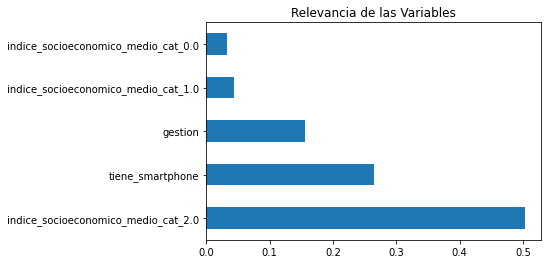

In [ ]:
feature_list = list(X_encoded.columns)
feature_imp= pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)
feature_imp.plot(kind='barh', title='Relevancia de las Variables')

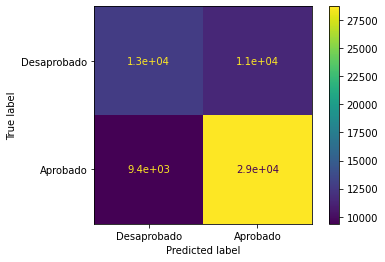

In [ ]:
plot_confusion_matrix(model, X_test, y_test, display_labels=["Desaprobado","Aprobado"])